# Choose a Data Set

Create your own dataset by scraping one of the following websites *(level 5)*:
- [Wikipedia](https://www.wikipedia.org/)
- [OpenLibrary](https://openlibrary.org/)

**OR** 

Use data gathered from one of the following APIs *(level 4)*: 
- [TMDB](https://developer.themoviedb.org/reference/intro/getting-started)
- [College Scorecard](https://collegescorecard.ed.gov/data/api-documentation/)

**OR** 

Pick a JSON dataset *(level 3)*:
- [Food/Restaurant Data](https://drive.google.com/drive/folders/1V94S6WpclvQmbnW88KVMD4EruryA1oma?usp=drive_link)
- [Fashion Data](https://drive.google.com/drive/folders/1V8SbFjtRRW8WVf3xBzg0gzLjOtMhHea_?usp=drive_link)

**OR** 

Pick a CSV dataset *(level 2)*:
- [LA Parking Tickets](https://drive.google.com/drive/folders/1vaOfwMi6QmZEGsXr8VM0ulPGzvTTBCgm?usp=drive_link)
- [Hotels](https://drive.google.com/drive/folders/1IpVFxgwBJvJHKoOuBsk6WK2qYqFYP4hi?usp=drive_link)

# My Question
### You are looking at the trending books, more specifically, the "This Year" trending category. If a book were to get into the "This Year" trending category, what is the expected amount of editions it would have? Also, what is the probabilty of the book having more than 100 editions?|

# My Answer

In [26]:
#Importing what we need
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import seaborn as sns

import numpy as np



In [2]:
def cycle_through5(page):
    book_ratings = {"Title": [], "Author": [], "Editions": []}  
    count = 1  # Start from the first page

    while count <= page: 
        url = f"https://openlibrary.org/trending/yearly?page={count}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        titles = soup.find_all("h3", {"class": "booktitle"})
        for title in titles:
            book_ratings["Title"].append(title.get_text(strip=True))

        authors = soup.find_all("a")
        for author in authors:
            if "/authors/" in author.get("href", ""):
                book_ratings["Author"].append(author.get_text(strip=True))

        
        #span_rate = soup.find_all('span', itemprop='ratingValue')   ### Finding rating, but there was a chage of plans!
        #for span in span_rate:
            #text = span.text.strip()
            #book_ratings["Rating"].append(text)
        
        
        editions = soup.find_all("a")
        for edition in editions:
    
            if "/works/" in edition.get("href", ""):
                edition_text = edition.get_text(strip=True)
        
                if "edition" in edition_text.lower():
                    match = re.search(r'\d+', edition_text) 
                    if match: 
                        number = match.group()  
                        book_ratings["Editions"].append(number)
            
        
        print(f"Page {count} scraped successfully.")
        count += 1

    min_length = min(len(book_ratings["Title"]), len(book_ratings["Author"]), len(book_ratings["Editions"]))
    for key in book_ratings:
        book_ratings[key] = book_ratings[key][:min_length]
    return book_ratings

In [3]:
df = pd.DataFrame(cycle_through5(20))
df

Page 1 scraped successfully.
Page 2 scraped successfully.
Page 3 scraped successfully.
Page 4 scraped successfully.
Page 5 scraped successfully.
Page 6 scraped successfully.
Page 7 scraped successfully.
Page 8 scraped successfully.
Page 9 scraped successfully.
Page 10 scraped successfully.
Page 11 scraped successfully.
Page 12 scraped successfully.
Page 13 scraped successfully.
Page 14 scraped successfully.
Page 15 scraped successfully.
Page 16 scraped successfully.
Page 17 scraped successfully.
Page 18 scraped successfully.
Page 19 scraped successfully.
Page 20 scraped successfully.


,Title,Author,Editions
0,Atomic Habits,James Clear,41
1,Control Your Mind and Master Your Feelings,Eric Robertson - undifferentiated,3
2,The 48 Laws of Power,Robert Greene,52
3,It Ends With Us,Joost Elffers,34
4,I Don't Love You Anymore,Colleen Hoover,2
...,...,...,...
393,Beloved,Όμηρος,23
394,Heartless,Anatoly Shcharansky,104
395,Into the Wild,Benjamin Graham,11
396,The Blood of Olympus,Alice Oseman,38


In [4]:
df["Editions"] = pd.to_numeric(df["Editions"], errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     398 non-null    object
 1   Author    398 non-null    object
 2   Editions  398 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


***Describe analysis here.***

### The code above is just scraping the web pages needed to make a dataframe that we can use for the rest of the problem. 
Also, there are many variables that say "book_ratings" when we are not looking at book ratings anymore because of a fluke that we saw in the "OpenLibrary". We just didn't change the variable name. We also discovered the "re" import. Also, making the function print "scraped successfully" is fun to watch, so it was kept.

In [24]:
# Alternate between code for analysis and markdown descriptions of your analysis
# Add more code or markdown cells if needed to fully explain analysis

# Define conditions and corresponding values
conditions = [
    df["Editions"] > 500,
    df["Editions"] > 100,
    df["Editions"] > 50,
    df["Editions"] > 30,
    df["Editions"] > 20,
    df["Editions"] >= 6,
    df["Editions"] <= 5
]
values = ["Way Too Many", "Too Many", "E_High", "High", "Medium", "Decent", "Few"]

# Assign values based on conditions
df["Edition_groups"] = np.select(conditions, values, default=0)

In [22]:
df

,Title,Author,Editions,Edition_groups
0,Atomic Habits,James Clear,41,High
1,Control Your Mind and Master Your Feelings,Eric Robertson - undifferentiated,3,Few
2,The 48 Laws of Power,Robert Greene,52,E_High
3,It Ends With Us,Joost Elffers,34,High
4,I Don't Love You Anymore,Colleen Hoover,2,Few
...,...,...,...,...
393,Beloved,Όμηρος,23,Medium
394,Heartless,Anatoly Shcharansky,104,Too Many
395,Into the Wild,Benjamin Graham,11,Decent
396,The Blood of Olympus,Alice Oseman,38,High


In [20]:
df["Editions"].min()

1

In [23]:
df["Edition_groups"].value_counts()

Few         93
Decent      83
Too Many    76
E_High      56
Why bro     35
High        33
Medium      22
Name: Edition_groups, dtype: int64

***Describe analysis here.***
### We categorized books by the amount of editions they have. For example, if a book has over 100 editions, it would be group as "Too Many", meaning that book has a lot of editions. A book with 26 editions would be categorized. This is done to also get the frequency of the groups, example, there are 83 books with a decent amount of editions.

<AxesSubplot:xlabel='Edition_groups', ylabel='Editions'>

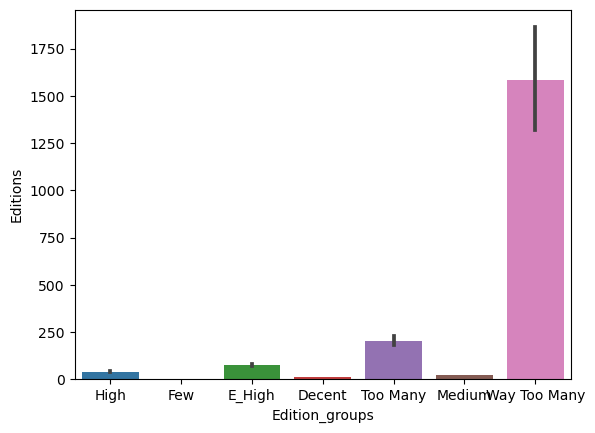

In [28]:
# Add more code/markdown cells here if you need them.
sns.barplot(x="Edition_groups", y="Editions", data=df)
